In [41]:
import pandas as pd
df=pd.read_csv("newdataset.csv")
df

,Unnamed: 0,BMDSTATS,RIAGENDR,RIDAGEYR,BMXWT,BHXHT,BMXLEG,BOXARML,BMXARMC,BMXWAIST,BMXHIP,OUTMAL
0,0,1,2,13,0.165946,0.775050,0.660000,0.677355,0.351938,0.340267,0.453333,1
1,1,1,1,2,0.047188,0.447395,0.704377,0.372745,0.229457,0.219733,0.563755,1
2,2,1,2,29,0.381832,0.802605,0.741818,0.695391,0.555039,0.628800,0.672533,0
3,3,1,2,18,0.296107,0.781563,0.774545,0.723447,0.480620,0.487467,0.563755,0
4,4,1,1,2,0.388517,0.913327,0.729091,0.841683,0.592248,0.642133,0.577067,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13132,13132,1,1,11,0.427841,0.845190,0.829091,0.773547,0.520930,0.611733,0.629333,0
13133,13133,1,2,12,0.060558,0.469439,0.704377,0.350701,0.244961,0.258133,0.563755,1
13134,13134,1,1,64,0.090051,0.617735,0.704377,0.486974,0.286822,0.306667,0.563755,1
13135,13135,1,2,12,0.312623,0.883768,0.763636,0.791583,0.486822,0.517867,0.532267,0


In [42]:
df=df.drop(['Unnamed: 0'],axis=1)

In [43]:
import numpy as np

In [44]:
X= df[['BMDSTATS'	,'RIAGENDR',	'RIDAGEYR',	'BMXWT',	'BHXHT',	'BMXLEG',	'BOXARML',	'BMXARMC',	'BMXWAIST',	'BMXHIP']].values
X[0:10]

array([[1.00000000e+00, 2.00000000e+00, 1.30000000e+01, 1.65945733e-01,
        7.75050100e-01, 6.60000000e-01, 6.77354709e-01, 3.51937984e-01,
        3.40266667e-01, 4.53333333e-01],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 4.71883602e-02,
        4.47394790e-01, 7.04376742e-01, 3.72745491e-01, 2.29457364e-01,
        2.19733333e-01, 5.63755337e-01],
       [1.00000000e+00, 2.00000000e+00, 2.90000000e+01, 3.81832481e-01,
        8.02605210e-01, 7.41818182e-01, 6.95390782e-01, 5.55038760e-01,
        6.28800000e-01, 6.72533333e-01],
       [1.00000000e+00, 2.00000000e+00, 1.80000000e+01, 2.96106960e-01,
        7.81563126e-01, 7.74545455e-01, 7.23446894e-01, 4.80620155e-01,
        4.87466667e-01, 5.63755337e-01],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.88517499e-01,
        9.13326653e-01, 7.29090909e-01, 8.41683367e-01, 5.92248062e-01,
        6.42133333e-01, 5.77066667e-01],
       [1.00000000e+00, 1.00000000e+00, 4.90000000e+01, 2.92174597e-01,
   

In [45]:
y=df['OUTMAL'].values
y[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [48]:
X

array([[ 1.        ,  2.        , 13.        , ...,  0.35193798,
         0.34026667,  0.45333333],
       [ 1.        ,  1.        ,  2.        , ...,  0.22945736,
         0.21973333,  0.56375534],
       [ 1.        ,  2.        , 29.        , ...,  0.55503876,
         0.6288    ,  0.67253333],
       ...,
       [ 1.        ,  1.        , 64.        , ...,  0.28682171,
         0.30666667,  0.56375534],
       [ 1.        ,  2.        , 12.        , ...,  0.48682171,
         0.51786667,  0.53226667],
       [ 1.        ,  2.        , 43.        , ...,  0.45271318,
         0.46346667,  0.48266667]])

In [49]:
model.score(X_test,y_test)

0.9843987823439878

In [50]:
y_predi =model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

In [52]:
cm=confusion_matrix(y_test,y_predi)

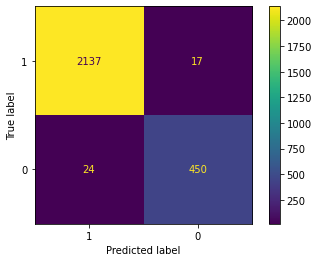

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()

In [54]:
print(classification_report(y_test,y_predi))
print("Random's forest accuracy",metrics.accuracy_score(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2154
           1       0.96      0.95      0.96       474

    accuracy                           0.98      2628
   macro avg       0.98      0.97      0.97      2628
weighted avg       0.98      0.98      0.98      2628

Random's forest accuracy 0.9843987823439878


In [55]:
Ks=101
mean_acc=np.zeros((11-1))
std_acc=np.zeros((11-1))
n=1
# for n in range(1,Ks):
while n!=Ks :
  neigh = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 42).fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n//10-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[n//10-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
  n+=10


In [56]:
std_acc

array([0.00253064, 0.00238822, 0.00241742, 0.00232865, 0.00238822,
       0.00223613, 0.00223613, 0.00229825, 0.00232865, 0.003451  ])

In [57]:
mean_acc

array([0.98287671, 0.9847793 , 0.98439878, 0.98554033, 0.9847793 ,
       0.98668189, 0.98668189, 0.98592085, 0.98554033, 0.96765601])

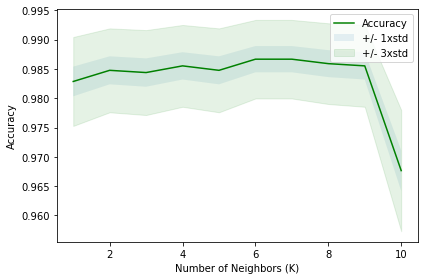

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), mean_acc,'g')

plt.fill_between(range(1, 11),mean_acc-1*std_acc,mean_acc + 1*std_acc, alpha=0.10)
plt.fill_between(range(1, 11), mean_acc-3*std_acc,mean_acc+ 3*std_acc, alpha=0.10, color="green")

plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))

plt.ylabel('Accuracy')

plt.xlabel('Number of Neighbors (K)')

plt.tight_layout()

plt.show()

In [59]:
print("The best accuracy was with", mean_acc.max(), "with k=", (mean_acc.argmax()+1)*10+1)

The best accuracy was with 0.9866818873668188 with k= 61
